In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from icecream import ic
import seaborn as sns

from sklearn.decomposition import PCA

sns.set()

In [6]:
X = np.random.rand(200,50)

pcaModel = PCA()
pcaModel.fit(X)

    

PCA()

In [12]:
nc = np.where(pcaModel.explained_variance_ratio_.cumsum() > 0.95)[0][0]

In [13]:
nc

42

In [14]:
pcaModel.n_components_

50

In [20]:
def PCAnalysis(energyValue,X):
    modelpca = PCA()
    modelpca.fit(X)
    nc = np.where(modelpca.explained_variance_ratio_.cumsum() > energyValue)[0][0]
    modelpca = PCA(n_components=nc)
    modelpca.fit(X)
    X2 = modelpca.transform(X)
    return X2

In [21]:
X = np.random.rand(200,50)
X2 = PCAnalysis(0.90,X)

In [22]:
X.shape

(200, 50)

In [23]:
X2.shape

(200, 38)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [34]:
def PR(degree=2,**kwargs):
    pipe = make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
    return pipe

In [35]:
X = np.arange(30)
y = 3*(X**2)-10*X+34
y_pred = PR(2).fit(X[:,np.newaxis],y).predict(X[:,np.newaxis])

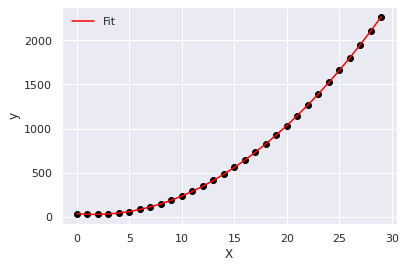

In [40]:
plt.scatter(X,y, color='black')
plt.plot(X,y_pred, color='red', label='Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left', frameon=False)

In [43]:
X = np.arange(30)
y = 3*(X**3)-10*(X**2)+34 + 50*np.random.randn(X.size)
y_pred = PR(2).fit(X[:,np.newaxis],y).predict(X[:,np.newaxis])

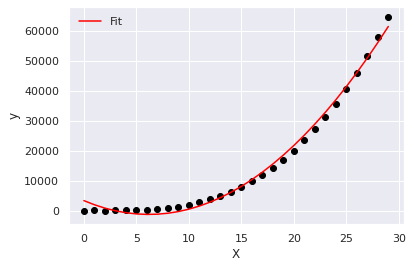

In [44]:
plt.scatter(X,y, color='black')
plt.plot(X,y_pred, color='red', label='Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left', frameon=False)

In [70]:
X = np.arange(50)/50
y = 3*(X**3)-10*(X**2)+34 + 0.2*np.random.randn(X.size)
y_pred = PR(2).fit(X[:,np.newaxis],y).predict(X[:,np.newaxis])

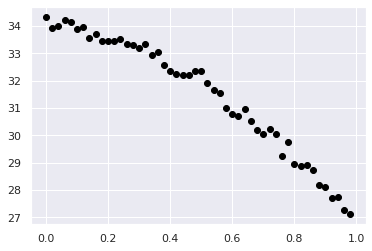

In [71]:
plt.scatter(X,y, color='black')

In [75]:
from sklearn.model_selection import validation_curve

In [76]:
degree = np.arange(0,15)
train_score, val_score = validation_curve(PR(),X[:,np.newaxis],y,'polynomialfeatures__degree',degree,cv=5)

/home/andsilva/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0, 0.5, 'score')

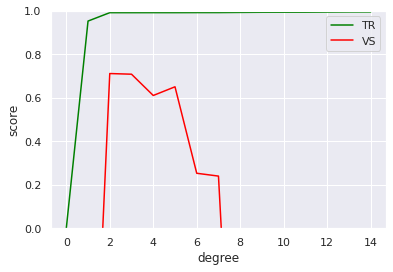

In [77]:
plt.plot(degree,np.median(train_score,1),color='green',label="TR")
plt.plot(degree,np.median(val_score,1),color='red',label="VS")
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")

In [78]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)


In [80]:
faces.data.shape

(1560, 2914)

In [82]:
faces.images[0].shape

(62, 47)

In [83]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [84]:
faces.target_names.size

12

In [86]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [87]:
faces.target_names[4]

'Gerhard Schroeder'

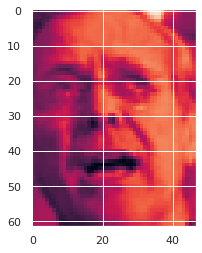

In [92]:
plt.imshow(faces.images[2])

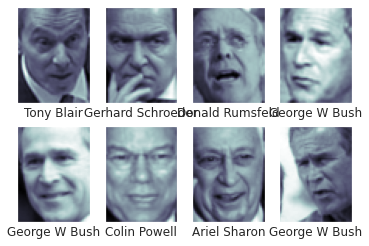

In [100]:
fig, ax = plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap='bone')
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [102]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


In [103]:
pcaModel = PCA(n_components=150,whiten=True)
svmModel = SVC(kernel='rbf', class_weight='balanced')
mdl = make_pipeline(pcaModel,svmModel)

In [104]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,faces.target,test_size=0.2)

In [106]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid = GridSearchCV(mdl,param_grid)

In [107]:
grid.fit(Xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [108]:
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [111]:
mdl = grid.best_estimator_

In [112]:
y_pred = mdl.predict(Xtest)

In [113]:
ytest

array([ 3,  2,  3,  1,  8,  3,  0, 11,  1,  3,  1,  1,  9,  1,  3, 11,  7,
        7,  9,  1, 10,  8,  3,  8, 11,  1, 11,  4, 11, 11,  4,  1,  2,  3,
        3,  1,  1,  3,  3,  3,  3,  1,  3,  8,  1,  7,  3,  3,  3,  3,  5,
        4,  3,  6,  3,  3,  3,  1,  1,  3,  3, 11,  9,  1,  3,  1,  3,  3,
        3, 11,  3,  4,  4,  3, 11,  5,  2,  1,  3,  6,  3,  1,  2,  3,  6,
        1,  3,  8, 11,  1,  3,  9,  1,  3, 11,  1,  7,  7,  4,  3,  3,  5,
        1,  3,  3, 10,  1,  6,  2, 11,  4,  1,  4,  3,  3,  4, 10, 11,  0,
        3,  1,  3,  3,  8,  2,  8,  0,  3,  9,  9,  2,  1,  2,  3,  1,  2,
        3,  3,  1, 11,  3,  3,  3,  5,  7, 11,  9,  0, 10,  5,  9, 10,  4,
        5,  3,  3,  4, 10,  3,  0, 11,  1,  6,  3,  1,  2,  1,  3,  3,  4,
        4,  3,  2,  1,  1,  3,  3,  8,  3, 11,  1,  3,  9,  4, 11,  4,  3,
        0,  1,  9,  1,  6,  6,  1,  1,  7,  4,  3,  1,  6,  1,  0,  3,  6,
        3, 11, 11,  3,  8,  8,  3,  2,  1,  3,  0,  3,  1,  4,  9,  9,  4,
       11,  1,  3, 11,  2

In [114]:
y_pred

array([ 3,  1,  3,  1,  8,  3,  0, 11,  1,  3,  1,  2,  9,  1,  3, 11,  7,
        7,  9,  1,  1,  3,  5,  3,  3,  1,  4,  4, 11, 11,  4,  1,  2,  3,
        1,  1,  1,  3,  3,  3,  1,  1,  3,  8,  1,  7,  3,  3,  3,  3,  5,
        1,  3, 10,  3,  3,  3,  1,  1,  3,  3, 11,  9,  1,  3,  1,  3,  3,
        3, 11,  0,  4,  4,  3, 11,  5,  2,  1,  3,  2,  3,  2,  2,  3,  6,
        3,  3,  3, 11,  1,  3,  9,  1,  1,  3,  1, 10,  2,  3,  5,  3,  5,
        1,  3,  3, 10,  1,  6,  2,  4, 11,  1,  4,  1,  3,  4, 10, 11,  0,
        3,  3,  3,  3,  1,  2,  8,  0,  3,  1,  9,  2,  1,  2,  3,  5,  2,
        3,  3,  1, 11,  1,  3,  3,  5,  7, 11,  9,  0, 10,  5,  9, 10,  4,
        1,  3,  3,  4, 10,  3,  0, 11,  1,  6,  1,  1,  2,  1,  3,  3,  6,
       11,  3,  2,  1,  3,  3,  3, 11,  3, 11,  1,  3,  5,  4, 11,  4,  3,
        0,  1,  1,  3,  6,  6,  1,  3,  7,  4,  3,  1,  1,  1,  0,  3,  6,
        1, 11, 11,  3,  8,  1,  3,  4,  1,  3,  0,  3,  0,  4,  9,  4,  4,
       11,  1,  3,  4,  2

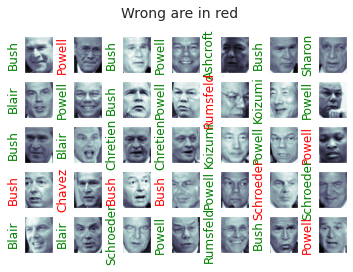

In [121]:
fig, ax = plt.subplots(5,7)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(Xtest[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==ytest[idx] else 'red')
    fig.suptitle('Wrong are in red', size=14)

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(ytest,y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.85      0.85      0.85        13
     Colin Powell       0.69      0.82      0.75        60
  Donald Rumsfeld       0.67      0.74      0.70        19
    George W Bush       0.86      0.87      0.86        98
Gerhard Schroeder       0.74      0.74      0.74        23
      Hugo Chavez       0.64      0.78      0.70         9
   Jacques Chirac       0.78      0.64      0.70        11
    Jean Chretien       1.00      0.75      0.86         8
    John Ashcroft       1.00      0.57      0.73        14
Junichiro Koizumi       1.00      0.62      0.77        16
  Serena Williams       0.73      0.73      0.73        11
       Tony Blair       0.80      0.80      0.80        30

         accuracy                           0.79       312
        macro avg       0.81      0.74      0.76       312
     weighted avg       0.80      0.79      0.79       312



Text(89.18, 0.5, 'predicted label')

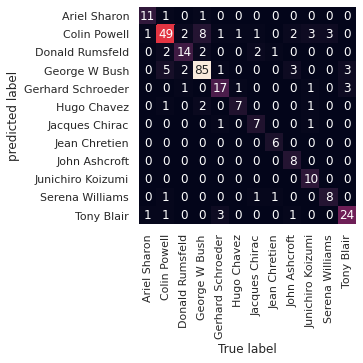

In [128]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel("True label")
plt.ylabel("predicted label")